# pyphysio tutorial

## 1. Signals

The class `Signal` together with the class `Algorithm` are the two main classes in pyphysio.

In this first tutorial we will see how the class `Signal` can be used to facilitate the management and processing of signals.

A signal is an ordered vector of timestamp-value pairs, where the timestamp is the instant at which the measured phenomenon had that value.
In pyphysio a signal is represented by the class **Signal** which extends the numpy.ndarray class.

In this part we will see the different types of signals that can be defined and their properties.

We start importing the packages needed for the tutorial:

In [1]:
# import packages
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

And then we import two classess of `pyphysio`: `EvenlySignal` and `UnevenlySignal`, both subclassess of the abstract class `Signal':

In [2]:
# import the Signal classes
from pyphysio import EvenlySignal, UnevenlySignal

### 1.1 EvenlySignal

When the signal is sampled with a fixed sampling frequency it is sufficient to know the timestamp at which the acquisition started and the sampling frequency (assumed to be constant) to reconstruct the timestamp of each sample. This type of signal is represented by the class **EvenlySignal**.

Therefore to create an instance of **EvenlySignal** these are the input attributes needed:
* ``values`` : (unidimensional numpy array) values of the signal;
* ``sampling_freq`` : (float>0) sampling frequency;
* ``start_time`` : (float) temporal reference of the start of the signal. This is optional, if omitted it will set to 0;
* ``signal_type`` : (string) identifier of the type of the signal. In future releases of pyphysio it will be used to check the appropriateness of the algorithms applied to the signal. Now it is optional and if omitted it will set to ''.

Class functions are provided to facilitate the management and processing of signals. For instance:
* `get_...()` and `set_...()` type functions can be used to check/set signal attributes;
* `plot()` will plot the signal using matplotlib;
* `segment_time(t_start, t_stop)` and `segment_idx(idx_start, idx_stop)` can be used to extract a portion of the signal;
* `resample(fout)` can be used to change the sampling frequency.

#### 1.1.1 Creation of a `EvenlySignal` object

In the following we generate a fake `EvenlySignal` using random generated numbers. Then we will use the methods provided by the class to inspect the signal characteristics:

In [3]:
# create a signal

## create fake data
np.random.seed(4)
signal_values = np.random.uniform(0, 1, size = 1000)

## set the sampling frequency
fsamp = 100 # Hz

## set the starting time
tstart = 100 # s

## create the Evenly signal
s_fake = EvenlySignal(values = signal_values, sampling_freq = fsamp, signal_type  = 'fake', start_time = tstart)

# chech signal properties
print('Sampling frequency: {}'.format( s_fake.get_sampling_freq() ))
print('Start time:         {}'.format( s_fake.get_start_time() ))
print('End time:           {}'.format( s_fake.get_end_time() ))
print('Duration:           {}'.format( s_fake.get_duration() ))
print('Signal type  :      {}'.format( s_fake.get_signal_type() ))
print('First ten instants: {}'.format( s_fake.get_times()[0:10] ))

Sampling frequency: 100
Start time:         100
End time:           110.0
Duration:           10.0
Signal type  :      fake
First ten instants: [100.   100.01 100.02 100.03 100.04 100.05 100.06 100.07 100.08 100.09]


#### 1.1.2 Plotting a signal

A shortcut is provided in `pyphysio` to plot a signal, using the `matplotlib` library:

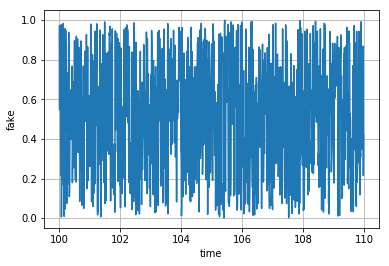

In [4]:
## plot
s_fake.plot()

#### 1.3 Working with physiological signals

In this second example we import the sample data included in `pyphysio` to show how the `EvenlySignal` class can be used to represent physiological signals:

In [5]:
import pyphysio as ph

In [6]:
# import data from included examples
from pyphysio.tests import TestData

ecg_data = TestData.ecg()
eda_data = TestData.eda()

The imported values can be used to create two new signals of the `EvenlySignal` class.

Note that we set different starting times for the ecg and the eda signal:

In [7]:
# create two signals
fsamp = 2048
tstart_ecg = 15
tstart_eda = 5

ecg = EvenlySignal(values = ecg_data, 
                   sampling_freq = fsamp, 
                   signal_type = 'ecg', 
                   start_time = tstart_ecg)

eda = EvenlySignal(values = eda_data, 
                   sampling_freq = fsamp, 
                   signal_type = 'eda', 
                   start_time = tstart_eda)

In the following plot note that the EDA signal start 10 seconds before the ECG signal.

Using the `start_time` parameter is therefore possible to manually synchronize multiple signals.

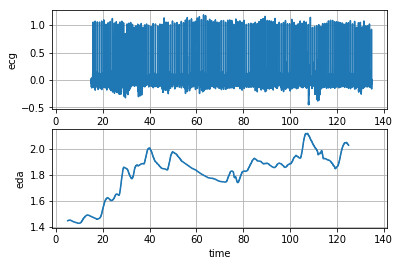

In [8]:
# plot
ax1 = plt.subplot(211)
ecg.plot()
plt.subplot(212, sharex=ax1)
eda.plot()

In [9]:
# check signal properties
print('ECG')
print('Sampling frequency: {}'.format( ecg.get_sampling_freq() ))
print('Start time:         {}'.format( ecg.get_start_time() ))
print('End time:           {}'.format( ecg.get_end_time() ))
print('Duration:           {}'.format( ecg.get_duration() ))
print('Signal type:        {}'.format( ecg.get_signal_type() ))
print('First ten instants: {}'.format( ecg.get_times()[0:10] ))
print('')
print('EDA')
print('Sampling frequency: {}'.format( eda.get_sampling_freq() ))
print('Start time:         {}'.format( eda.get_start_time() ))
print('End time:           {}'.format( eda.get_end_time() ))
print('Duration:           {}'.format( eda.get_duration() ))
print('Signal type  :      {}'.format( eda.get_signal_type() ))
print('First ten instants: {}'.format( eda.get_times()[0:10] ))

ECG
Sampling frequency: 2048
Start time:         15
End time:           135.0
Duration:           120.0
Signal type:        ecg
First ten instants: [15.         15.00048828 15.00097656 15.00146484 15.00195312 15.00244141
 15.00292969 15.00341797 15.00390625 15.00439453]

EDA
Sampling frequency: 2048
Start time:         5
End time:           125.0
Duration:           120.0
Signal type  :      eda
First ten instants: [5.         5.00048828 5.00097656 5.00146484 5.00195312 5.00244141
 5.00292969 5.00341797 5.00390625 5.00439453]


#### 1.4 Managing the sampling frequency
The sampling frequency of a signal is defined before the acquisition. However it is possible to numerically change it in order to oversample or downsample the signal, according to the signal type and characteristics.

Note in the plot below the effect of downsampling the ECG.

(40, 42)

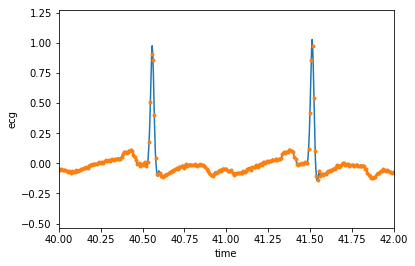

In [10]:
# resampling
ecg_128 = ecg.resample(fout=128)

ecg.plot() # plotting the original signal
ecg_128.plot('.') # plotting the samples of the downsampled signal
plt.xlim((40,42)) # setting the range of the x axis between 40 and 42 seconds

### 1.2 UnevenlySignal

Other types of signals, for instance triggers indicating occurrences of heartbeats or events, are series of samples which are not equally temporally spaced. Thus the sampling frequency is not fixed and it is necessary to store the timestamp of each sample. This type of signals is represented by the class **UnevenlySignal**.

Therefore to create an instance of **UnevenlySignal** additional input attributes are needed:
* `x_values` : (unidimensional numpy array) information about the temporal position of each sample. Should be of the same size of ``values``;
* `x_type` : (`'instants'` or `'indices'`) indicate what type of x_values have been used.

Two ways are allowed to define an **UnevenlySignal**:
1. by defining the indexes (`x_type='indices'`): x_values are indices of an array and the instants are automatically computed using the information from the `sampling_frequency` and the `start_time`. 
2. by defining the instants (`x_type='instants'`): x_values are instants and the indices are automatically computed using the information from the `sampling_frequency` and the `start_time`. 

As a general rule, the `start_time` is always associated to the index 0.

An additional class function is provided to transform an **UnevenlySignal** to an **EvenlySignal**:
* `to_evenly()` create an `EvenlySignal` by interpolating the signal with given signal sampling frequency.

#### 1.2.1 Creating an `UnevenlySignal` object

In the following we generate a fake `UnevenlySignal` using random generated numbers. 
We will use two methods to provide the temporal information about each sample:
1. by providing the information about the indices;
2. by providing the informatino about the instants.

Then we will use the provided methods to inspect the signal characteristics:

In [11]:
## create fake data
signal_values = np.arange(100)

Create an `UnevenlySignal` object providing the indices:

In [12]:
## create fake indices
idx = np.arange(100)
idx[-1] = 125

## set the sampling frequency
fsamp = 10 # Hz

## set the starting time
tstart = 10 # s

## create an Unevenly signal defining the indices
x_values_idx = idx

s_fake_idx = UnevenlySignal(values = signal_values, 
                            sampling_freq = fsamp, 
                            signal_type = 'fake', 
                            start_time = tstart,
                            x_values = x_values_idx, 
                            x_type = 'indices')

Create an `UnevenlySignal` object providing the instants:

In [13]:
## create an Unevenly signal defining the instants

x_values_time = np.arange(100)/fsamp
x_values_time[-1] = 12.5
x_values_time += 10


## set the starting time
tstart = 0 

s_fake_time = UnevenlySignal(values = signal_values, 
                             sampling_freq = fsamp, 
                             signal_type = 'fake', 
                             start_time = tstart, 
                             x_values = x_values_time, 
                             x_type = 'instants')

Note in the following plot that the interval between the last two samples is different from all the others:

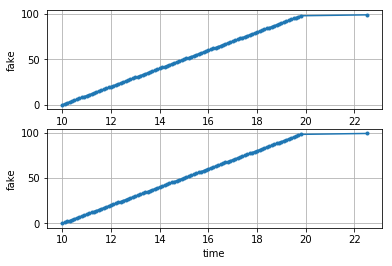

In [14]:
#plot
ax1=plt.subplot(211)
s_fake_idx.plot('.-')
plt.subplot(212, sharex=ax1)
s_fake_time.plot('.-')

In [15]:
# note that the times are the same but not the starting_time nor the indices:

# check samples instants
print('Instants:')
print(s_fake_idx.get_times())
print(s_fake_time.get_times())

# check samples indices
print('Indices:')
print(s_fake_idx.get_indices())
print(s_fake_time.get_indices())

# check start_time
print('Start time:')
print(s_fake_idx.get_start_time())
print(s_fake_time.get_start_time())

Instants:
[10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3
 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7
 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5
 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9
 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7
 19.8 22.5]
[10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3
 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7
 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5
 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9
 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4

In [16]:
# chech signal properties
print('Defined by Indices')
print('Sampling frequency: {}'.format( s_fake_idx.get_sampling_freq() ))
print('Start time:         {}'.format( s_fake_idx.get_start_time() ))
print('End time:           {}'.format( s_fake_idx.get_end_time() ))
print('Duration:           {}'.format( s_fake_idx.get_duration() ))
print('Signal type:        {}'.format( s_fake_idx.get_signal_type() ))
print('First ten instants: {}'.format( s_fake_idx.get_times()[0:10] ))
print('')
print('Defined by Instants')
print('Sampling frequency: {}'.format( s_fake_time.get_sampling_freq() ))
print('Start time:         {}'.format( s_fake_time.get_start_time() ))
print('End time:           {}'.format( s_fake_time.get_end_time() ))
print('Duration:           {}'.format( s_fake_time.get_duration() ))
print('Signal type:        {}'.format( s_fake_time.get_signal_type() ))
print('First ten instants: {}'.format( s_fake_time.get_times()[0:10] ))

Defined by Indices
Sampling frequency: 10
Start time:         10
End time:           22.6
Duration:           12.6
Signal type:        fake
First ten instants: [10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9]

Defined by Instants
Sampling frequency: 10
Start time:         0
End time:           22.6
Duration:           22.6
Signal type:        fake
First ten instants: [10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9]


#### 1.2.2 From `UnevenlySignal` to `EvenlySignal`

It is possible to obtain an `EvenlySignal` from an `UnevenlySignal` by interpolation, using the method `to_evenly` of the class `UnevenlySignal`:

In [17]:
# to_evenly
s_fake_time_evenly = s_fake_time.to_evenly(kind = 'linear')

Note how the interval between the last two samples has been interpolated in the `EvenlySignal` version (blue) of the original signal (yellow):

<class 'pyphysio.Signal.EvenlySignal'>
<class 'pyphysio.Signal.UnevenlySignal'>


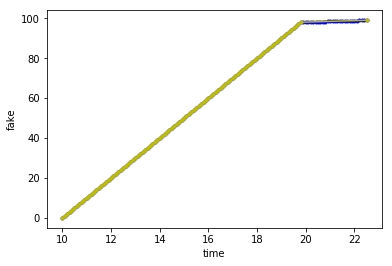

In [18]:
s_fake_time_evenly.plot('.-b')
s_fake_time.plot('.-y')

# check type
print(type(s_fake_time_evenly))
print(type(s_fake_time))

### 1.3 Segmentation of signals

Two general class functions are provided to segment a signal:
1. `segment_time(t_start, t_stop)` is used to extract a portion of the signal between the instants `t_start` and
`t_stop`;
2. `segment_idx(idx_start, idx_stop)` is used to extract a portion of the signal between the indices `idx_start` and `idx_stop`.

The output signal will inherit **`sampling_freq`** and **`signal_nature`** but the **`start_time`** will be set to **`t_start`** or to the instant corresponding to **`idx_start`** accordingly to the method used.

In [19]:
# segmentation of ES
ecg_segment = ecg.segment_time(45, 54)
eda_segment = eda.segment_time(45, 54)

45.0


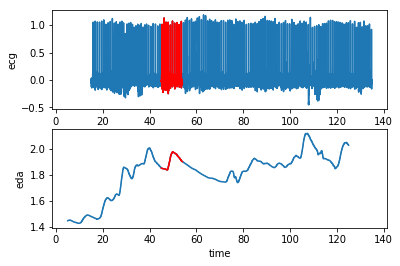

In [20]:
# plot
ax1 = plt.subplot(211)
ecg.plot()
ecg_segment.plot('r')

plt.subplot(212, sharex=ax1)
eda.plot()
eda_segment.plot('r')

print(ecg_segment.get_start_time())

In [21]:
# segmentation of US

s_fake_idx_segment = s_fake_idx.segment_time(10.5, 18)
s_fake_time_segment = s_fake_time.segment_time(10.5, 18)

10.5


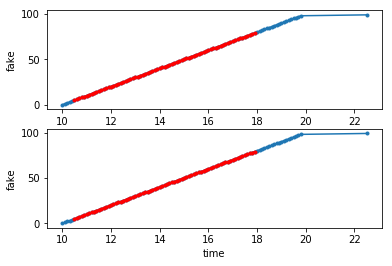

In [22]:
# plot
ax1 = plt.subplot(211)
s_fake_idx.plot('.-')
s_fake_idx_segment.plot('.-r')

plt.subplot(212, sharex=ax1)
s_fake_time.plot('.-')
s_fake_time_segment.plot('.-r')

print(s_fake_time_segment.get_start_time())